**Introduction:**
     Project: Goal to find the most desirable neighborhood to live in for a certain group.
     Approach: Discussed many different types of people that we could cater to including families, college students, those who liked                nature etc.
     Process: We first looked through the data sets and found connections between data sets. We found many data sets including crime      reports, number of parks, and number of community facilities that all have a common thread. They would be appealing to know for      families that have children that are looking for a neighborhood that is safe and has places for their children to play.

**Personal Metrics:**
Neighborhood with largest amount of playground/parks.
Neighborhood with largest amount of community facilities.
Neighborhood with least amount of crime reports.

**Combined Metric:**
What is the best neighborhood for a family with children who are looking for a safe and fun environment to raise their children.

**Best Neighborhood:**
All in all, the best neighborhood would be Squirrel Hill South. Putting all the data into a spreadsheet, each neighborhood was given a score based on their position in each of the three categories. The scores were added up in order to find the average score. This average score was then used to make a new ranking of the best neighborhoods. Squirrel Hill South came in with the lowest average score of 28. The second best neighborhood was Allegheny Center at a score of 33.33 with Highland Park placing 3rd with a score of 34.444.

**Conclusion:**

Aidan: While my personal favorite neighborhood from this list was Highland Park with a good balance of all three metrics and a seemingly quiter neighborhood than Squirrel Hill South, it ended up having a worse score because it has less parks and facilities compared to Squirrel Hill South. This leads me to believe that while the data driven determination is helpful to observe the differences and strengths of neighborhoods, it is not an end all be all for picking the best neighborhood to raise children.

Ian: My personal favorite neighborhood was Beechview due to it's high number of parks and recreation centers. This neighborhood was dragged down in the rankings due to its higher poor preformance in the ranking of arrests but is all around a pretty good neighborhood of Pittsburgh. The system we created is a general outline for ranking neighborhoods, but there are exceptions to it and some neighborhoods may be deserving of a higher or lower ranking. While by my own metric Troy Hill-Herrs Island was the best neighborhood, its poor performance in the other categories lead me to not selecting it as a personal favorite.

Kiro: According to my personal metric, the best neighborhood is Perry South leading all other neighborhoods with 27 community facilities.

*Code bellow is the general template for how we organize and sorted through the data in the csv files. In order for it to remain general, the specific names have been replaced with "PLACE HOLDER". (When the place holder is replaced, the code will execute properly.)*

In [ ]:
# imports pandas and sets park to the file contents
import pandas as pd
park = pd.read_csv("PLACE HOLDER")


# creates a dictionary
dictionary = dict()

# iterates through the rows of ROW PLACE HOLDER column
for index, row in park.iterrows():
    name = row["ROW PLACE HOLDER"]
    
    # if new neighborhood is seen for the first time, it gets added to the dictionary as a key
    if name not in dictionary:
        dictionary[name] = 1
    # if duplicate neighborhood is seen, a value is added
    else:
        dictionary[name] +=1

# this sorts the dictioanry in decending order based on the value assigned to the key
sortedDictionary = sorted(dictionary, key = dictionary.get, reverse = True)
# for every key in the sorted version of the dictionary it prints out the key and the value
for key in sortedDictionary:
    print(key, dictionary[key])

*This image showcases how the calculations for the combined neighborhood was made after using code to assemble the top neighborhoods for each categories*

![Alt text](bigIdeasPicture.png)



*This code sample displays both the park and arrest graph for comparison. As seen, there is no overlap which is due to the number of arrests correlated with population size. Since there is no one neighborhood with both the lowest crime and most amount of parks and facilities, it all had to be calculated by hand by arranging the data in a spreadsheet. The calculation however, heavily relied on the rankings determined by the code.*

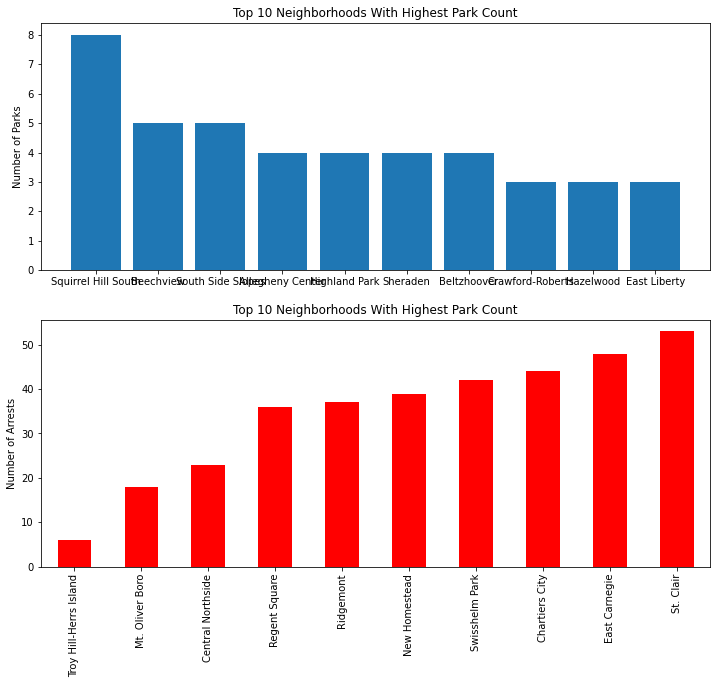

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# park graph
park = pd.read_csv("parkData.csv")

# creates a dictionary
dictionary_parks = dict()

# iterates through the rows of neighborhood column
for index, row in park.iterrows():
    name = row["neighborhood"]
    if name not in dictionary_parks:
        dictionary_parks[name] = 1
    else:
        dictionary_parks[name] += 1

# this sorts the dictioanry in decending order based on the value assigned to the key
# had to make changes to this line to be compatable with matplotlib
sortedDictionary_parks = dict(sorted(dictionary_parks.items(), key=lambda item: item[1], reverse=True))


#___________________________________________________________________________________________________________________________________
# arrest graph
policeData = pd.read_csv("PittsburghArrests.csv")

#creates a dictionary
neighborhoods = dict()

# goes through arrest data and connects each neighborhood to the total number of arrests reported there
for index, row in policeData.iterrows():
    if row["INCIDENTNEIGHBORHOOD"] in neighborhoods:
        neighborhoods[row["INCIDENTNEIGHBORHOOD"]] += 1
    else:
        neighborhoods[row["INCIDENTNEIGHBORHOOD"]] = 1

# sorts neighborhoods from least to most arrests
sortedNeighborhoods_arrests = dict(sorted(neighborhoods.items(), key=lambda x: x[1]))

# creates the subplots (they get combined during display)
fig, (parkGraph, arrestGraph) = plt.subplots(2, 1, figsize=(12, 10))

# the parks graph goes on top
parkGraph.bar(list(sortedDictionary_parks.keys())[:10], list(sortedDictionary_parks.values())[:10])
parkGraph.set_ylabel("Number of Parks")
parkGraph.set_title("Top 10 Neighborhoods With Highest Park Count")


# the arrests graph goes on bottom
# also adds color for better contrast
pd.Series(list(sortedNeighborhoods_arrests.values())[1:11], index=list(sortedNeighborhoods_arrests.keys())[1:11]).plot.bar(ax=arrestGraph, color='red')
arrestGraph.set_ylabel("Number of Arrests")
arrestGraph.set_title("Top 10 Neighborhoods With Highest Park Count")


# shows the two graphs combined
plt.show()